<a href="https://colab.research.google.com/github/owemecoffee/new-story/blob/main/deeplizard_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome！ 
> This is a notebook wrote for [deeplizard tutorial](https://deeplizard.com/learn/video/v5cngxo4mIg). 

**Hope it helps you:-)**

# Intro to Pytorch

*   it is a a deep learning framework and a scientific computing package. 
*   primarily a result PyTorch's tensor library and associated tensor operations.
*   initially released in oct 2016. Same crew with Torch.
*   maintained by Facebook.

## Packages Needed
*    modules and extensible classes for building neural networks.

```
# torch.nn
```

*  loss functions, activation functions, and convolution operations.


```
# torch.nn.functional
```

*  optimization operations like SGD, Adam


```
#  torch.optim
```

*  utility classes like data sets and data loaders that make data preprocessing easier.



```
# torch.utils
```
*  provides access to popular datasets, model architectures, and image transformations for computer vision.



```
# torchvision
```

## Why Use GPU
*(Graphics Processing Unit, good at handling specialized computations.)*
Neural network can very easily be broken into parallel computation, and GPU may afford thousands of PC at the same time. In compatision, CPU has only several cores.

**But GPU can be slower tham CPU with division task time**


## CUDA
is a software developed by Nvidia, thus very well use the Nvidia GPU for acceleration.






In [36]:
import torch
import torchvision
import torch.nn
import torch.utils
import torch.optim

# Tensor

*   A tensor is an n-dimensional array.
*   A data structure used by neural network.
*   general expression for :


> A scalar is a 0 dimensional tensor                          
> A vector is a 1 dimensional tensor                        
> A matrix is a 2 dimensional tensor                               
> A nd-array is an n dimensional tensor

* has attributes like:

> *   Rank: the number of dimensions present within the tensor. 
*   Axes: a specific dimension of a tensor.
*   Shape:  the length of each axis of the tensor.
*   stride: how the tensor is stored in memory.










In [37]:
t = torch.tensor([[1,2,3],[4,5,6],[6,7,8],[9,10,11]])
t

tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 6,  7,  8],
        [ 9, 10, 11]])

In [38]:
t.shape

torch.Size([4, 3])

Here we can see the tensor has 2 ranks, on the 1th axes, the length is 3. The shape is 4*3.

## Tensor Attributes and Operations
* attributes:
>torch.dtype         
torch.device      
torch.layout
* creation ways:
> torch.Tensor(data):type float,  constructor, copy
> ** torch.tensor(data)** :  factory func, copy  
> torch.as_tensor(data):  share  
> torch.from_numpy(data): share
* operations:
> * reshape  
> * Squeeze: removes the dimensions or axes that have a length of one.
> * Unsqueeze: adds a dimension with a length of one.
>* flatten： remove all of the dimensions except for one.
> * concatenate
> * stack : concatenate tensor on a new dimension
> * boardcast: add scalars to higher dimensional tensors.
> * sum, prod, mean, std: (dim=0) specify the dimension to do the operation.
> * numel
>* max, argmax: the maximum and its index



In [39]:
print(t.dtype)
print(t.device)
print(t.layout)

torch.int64
cpu
torch.strided


In [40]:
# change device to GPU
device = torch.device('cuda')
device

device(type='cuda')

In [41]:
t

tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 6,  7,  8],
        [ 9, 10, 11]])

In [42]:
t + 1
# broadcast

tensor([[ 2,  3,  4],
        [ 5,  6,  7],
        [ 7,  8,  9],
        [10, 11, 12]])

# Data and Processing


*   typical CNN input has 4 ranks, which are  [Batch, Channels, Height, Width]



In [43]:
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [44]:
#FashionMNIST dataset
train_set = torchvision.datasets.FashionMNIST(
    root='./data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor() #turn to tensor
    ])
)

In [45]:
# load dataset
train_loader = torch.utils.data.DataLoader(train_set
    ,batch_size=10
    ,shuffle=True
)

In [46]:
print("The dataset has :",len(train_set)," items.")
print("With those ",np.unique(train_set.targets)," targets.")
print("EAch class has ",train_set.targets.bincount(), " items.")

The dataset has : 60000  items.
With those  [0 1 2 3 4 5 6 7 8 9]  targets.
EAch class has  tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])  items.


Label :  9


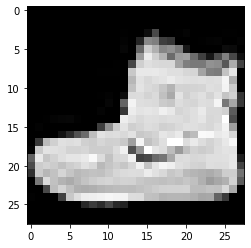

In [47]:
#show one sample
sample = next(iter(train_set))
image, label = sample
plt.imshow(image.squeeze(), cmap='gray')
print("Label : ", label)

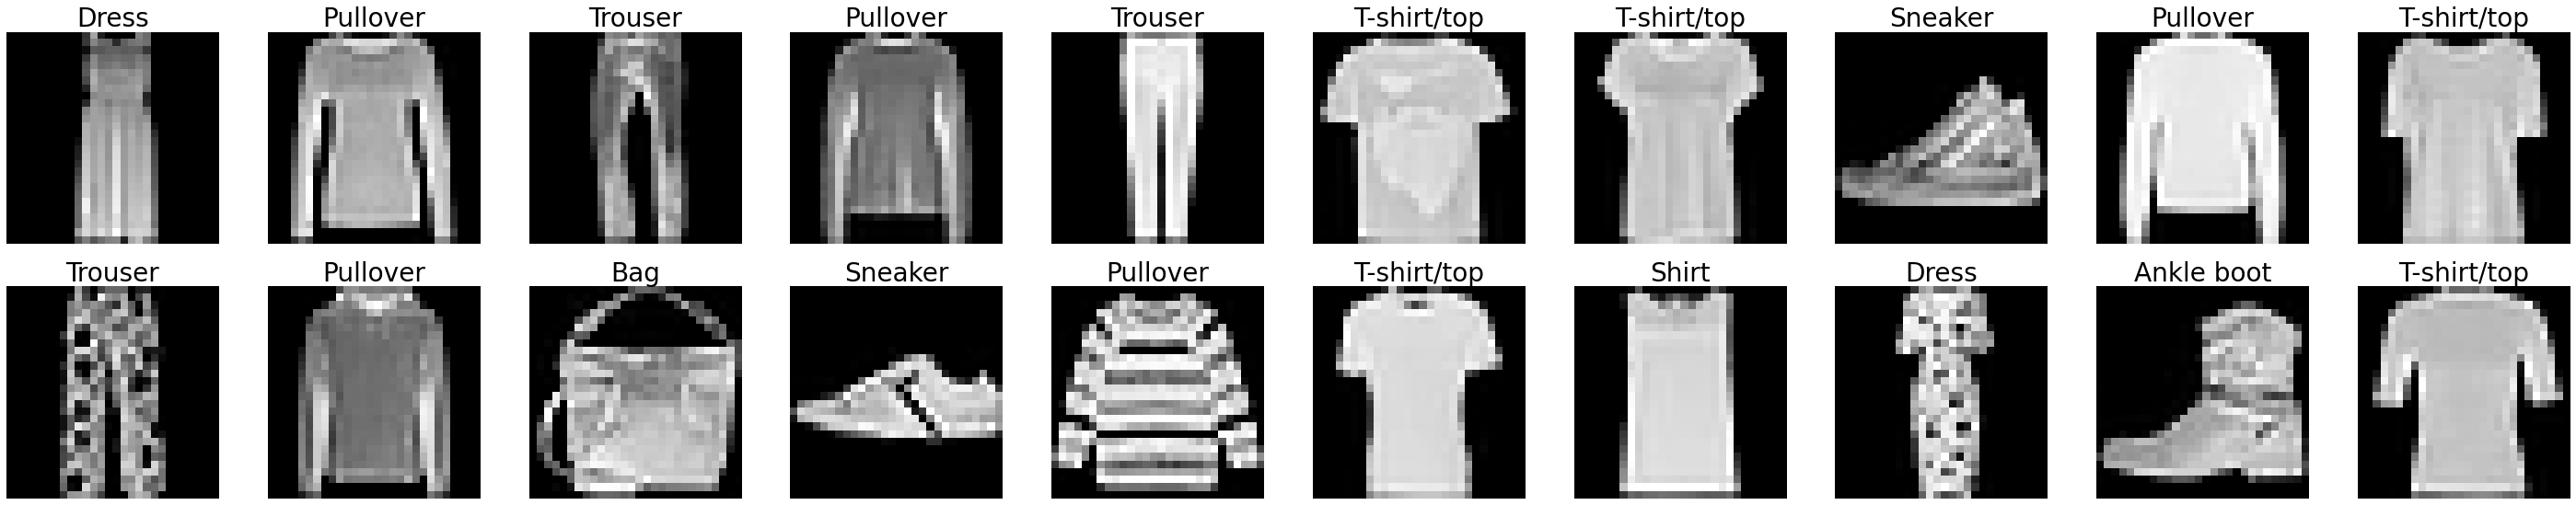

In [48]:
#plot lots of items
how_many_to_plot = 20

train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=1, shuffle=True
)
#have the data reshuffled at every epoch

plt.figure(figsize=(50,50))

for i, batch in enumerate(train_loader, start=1):
    image, label = batch
    plt.subplot(10,10,i)
    plt.imshow(image.reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.title(train_set.classes[label.item()], fontsize=28)
    if (i >= how_many_to_plot): break
plt.show()

# Neural Network

In [49]:
import torch.nn as nn

In [50]:
class Network(nn.Module): # 继承nn.module
    def __init__(self):
        super(Network, self).__init__()
        #2 conv layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5) # inchannel decided by dataset
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12,kernel_size=5)
        #3 linear layers
        self.fc1 = nn.Linear(in_features = 12*4*4, out_features=120) # 卷积核4*4
        self.fc2 = nn.Linear(in_features= 120, out_features =60)# 互相依赖
        self.out = nn.Linear(in_features=60, out_features=10) # out channel decided by dataset

    def forward(self, t):#相当于一个很多组合的函数
      #input layer
      t=t

      #hidden conv 1 layer
      t = self.conv1(t)
      t = F.relu(t)
      t = F.max_pool2d(t,kernel_size=2,stride=2)

      #hidden conv 2 layer
      t = self.conv2(t)
      t = F.relu(t)
      t = F.max_pool2d(t,kernel_size=2, stride=2)

      #hidden linear 1 layer
      t = t.reshape(-1,12*4*4) # 4*4是连接池化后的情况
      t = self.fc1(t)
      t = F.relu(t)

      #hidden linear 1 layer
      t = self.fc2(t)
      t = F.relu(t)

      #output layer
      t = self.out(t)
      t = F.softmax(t,dim=1)

      return t

In [51]:
network = Network()
network

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

In [52]:
print(network.conv1.weight.shape)
print(network.conv2.weight.shape)
print(network.fc1.weight.shape)
print(network.fc2.weight.shape)

torch.Size([6, 1, 5, 5])
torch.Size([12, 6, 5, 5])
torch.Size([120, 192])
torch.Size([60, 120])


## Forward Propagation
* transform input tensor to a output.

*Try to debug at this point*


In [53]:
sample = next(iter(train_set))
image, label = sample
image.unsqueeze(0).shape
# image shape needs to be (batch_size × in_channels × H × W)

torch.Size([1, 1, 28, 28])

In [56]:
#apply forward method to a image, output (random) prediction for each class
pred = network(image.unsqueeze(0)) 
pred.sum() 

tensor(1.0000, grad_fn=<SumBackward0>)

## Architecture

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torch.utils.data
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
from collections import OrderedDict
from collections import namedtuple
from itertools import product
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
from IPython.display import display, clear_output
import pandas as pd
import time
import json
import math

In [ ]:
class Network(nn.Module):
    def __init__(self, channels=1): # default grayscale
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=channels, out_channels=6, kernel_size=5) 
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120) # ((28-5+1)/2 -5 +1)/2 = 4
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
        
    def forward(self, t):        
        # hidden conv layers, conv w/ relu activation -> max pool
        t = F.relu(self.conv1(t))
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
        t = F.relu(self.conv2(t))
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # hidden fully connected layers
        t = t.reshape(-1, 12*4*4) # flatten
        t = F.relu(self.fc1(t))
        t = F.relu(self.fc2(t))
        
        # output layer
        t = self.out(t)
        return t
    
def get_num_correct(preds, labels):
    return (preds.argmax(dim=1) == labels).sum().item()

In [ ]:
torch.manual_seed(50)
network = Network()
network

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

### A concise way

In [ ]:
torch.manual_seed(50)
sequential = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Flatten(start_dim=1),
    nn.Linear(in_features=12*4*4, out_features=120),
    nn.ReLU(),
    nn.Linear(in_features=120, out_features=60),
    nn.ReLU(),
    nn.Linear(in_features=60, out_features=10)
)

## Loop Run builder
* to have multiple runs with varying parameters.
* use Cartesian Product, basically group every combinations across sets.
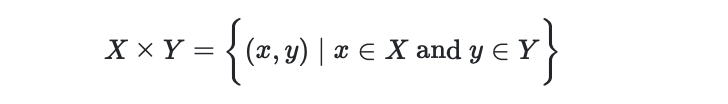
* need both RunBuilder and RunManager


In [57]:
from collections import OrderedDict
from collections import namedtuple
#computes a Cartesian product
from itertools import product

In [58]:
# to prepare iteration run data
class RunBuilder():
    @staticmethod
    def get_runs(params):#run based on paras we passed
        Run = namedtuple('Run', params.keys())
        runs = []
        for v in product(*params.values()):
            runs.append(Run(*v))

        return runs
    

In [61]:
#a example with get_runs
params = OrderedDict(
    lr = [.01, .001]
    ,batch_size = [1000, 10000]
    ,device = ["cuda", "cpu"]
)

runs = RunBuilder.get_runs(params)
runs

[Run(lr=0.01, batch_size=1000, device='cuda'),
 Run(lr=0.01, batch_size=1000, device='cpu'),
 Run(lr=0.01, batch_size=10000, device='cuda'),
 Run(lr=0.01, batch_size=10000, device='cpu'),
 Run(lr=0.001, batch_size=1000, device='cuda'),
 Run(lr=0.001, batch_size=1000, device='cpu'),
 Run(lr=0.001, batch_size=10000, device='cuda'),
 Run(lr=0.001, batch_size=10000, device='cpu')]

In [63]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
from IPython.display import display, clear_output
import pandas as pd
import time
import json

from itertools import product
from collections import namedtuple
from collections import OrderedDict

In [66]:
#allow us to manage each run with epoch and batch inside our run loop. 
#record accuracy, loss etc. and pull out TensorBoard calls.
class RunManager:
  def __init__(self):

    self.epoch_count = 0
    self.epoch_loss = 0
    self.epoch_num_correct = 0
    self.epoch_start_time = None

    self.run_params = None
    self.run_count = 0
    self.run_data = []
    self.run_start_time = None

    self.network = None
    self.loader = None
    self.tb = None

  def begin_run(self, run, network, loader):
    self.run_start_time = time.time()
    self.run_params = run
    self.run_count += 1
    self.network = network
    self.loader = loader
    #for identifying TensorBoard
    self.tb = SummaryWriter(comment=f'-{run}')

    images, labels = next(iter(self.loader))
    grid = torchvision.utils.make_grid(images)

    self.tb.add_image('images', grid)
    self.tb.add_graph(self.network, images)

  def end_run(self):
    self.tb.close()
    self.epoch_count = 0

  def begin_epoch(self):
    self.epoch_start_time = time.time()

    self.epoch_count += 1
    self.epoch_loss = 0
    self.epoch_num_correct = 0

  def end_epoch(self):

    epoch_duration = time.time() - self.epoch_start_time
    run_duration = time.time() - self.run_start_time

    loss = self.epoch_loss / len(self.loader.dataset)
    accuracy = self.epoch_num_correct / len(self.loader.dataset)

    self.tb.add_scalar('Loss', loss, self.epoch_count)
    self.tb.add_scalar('Accuracy', accuracy, self.epoch_count)

    for name, param in self.network.named_parameters():
        self.tb.add_histogram(name, param, self.epoch_count)
        self.tb.add_histogram(f'{name}.grad', param.grad, self.epoch_count)
    
    results = OrderedDict()
    results["run"] = self.run_count
    results["epoch"] = self.epoch_count
    results['loss'] = loss
    results["accuracy"] = accuracy
    results['epoch duration'] = epoch_duration
    results['run duration'] = run_duration
    for k,v in self.run_params._asdict().items(): results[k] = v
    self.run_data.append(results)

    df = pd.DataFrame.from_dict(self.run_data, orient='columns')

  #track epoch loss 
  def track_loss(self, loss, batch):
    self.epoch_loss += loss.item() * batch[0].shape[0]
  #track epoch correct numbers
  def track_num_correct(self, preds, labels):
      self.epoch_num_correct += self._get_num_correct(preds, labels)
  # calculate the number of correct predictions
  def _get_num_correct(self, preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()
  #saves the run_data in two formats, json and csv
  def save(self, fileName):

    pd.DataFrame.from_dict(
        self.run_data, orient='columns'
    ).to_csv(f'{fileName}.csv')

    with open(f'{fileName}.json', 'w', encoding='utf-8') as f:
        json.dump(self.run_data, f, ensure_ascii=False, indent=4)

In [ ]:
class Epoch():
    def __init__(self):
        self.count = 0
        self.loss = 0
        self.num_correct = 0
        self.start_time = None 

In [67]:
#test with RunManager
params = OrderedDict(
    lr = [.01]
    ,batch_size = [1000, 2000]
    ,shuffle = [True, False]
)

m = RunManager()
for run in RunBuilder.get_runs(params):
  network = Network()
  loader = DataLoader(train_set, batch_size=run.batch_size)
  optimizer = optim.Adam(network.parameters(), lr=run.lr)

  m.begin_run(run, network, loader)
  for epoch in range(5):
    m.begin_epoch()
    for batch in loader:
      images = batch[0]
      labels = batch[1]
      preds = network(images)
      loss = F.cross_entropy(preds, labels)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      m.track_loss(loss,batch)
      m.track_num_correct(preds, labels)

    m.end_epoch()
  m.end_run()

m.save('results')
#result saved in cvs, json file

### Set workers i  DataLoader
* speed up the neural network training process by utilizing the multiple process capabilities

In [ ]:

# params = OrderedDict(
#     lr = [.01]
#     ,batch_size = [1000, 2000]
#     ,num_workers = [0,2,4,8]
# )

# loader = DataLoader(train_set, batch_size=run.batch_size, num_workers=run.num_workers)

## Normalization
* transforming the original values of a dataset to new scaled values
* standardization
 * z = (x-mean) / std    
 * transforms the dataset's mean value to 0 and its standard deviation to 1.


### dataset setting

In [ ]:
# Get data
train_set = torchvision.datasets.FashionMNIST(
    root='./data/FashionMNIST',
    download=True,
    transform=transforms.ToTensor()
)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



### Compute the mean, std

In [ ]:
loader = torch.utils.data.DataLoader(train_set, batch_size=1000,num_workers=1)
data = next(iter(loader))
num_of_pixels = len(train_set) * 28 * 28

#compute mean
total_sum = 0
for batch in loader: total_sum += batch[0].sum()
mean = total_sum/ num_of_pixels
#compute standard
sum_of_squared_error = 0
for batch in loader: sum_of_squared_error += ((batch[0] - mean).pow(2)).sum(2)
std = torch.sqrt(sum_of_squared_error / num_of_pixels)

mean, std

(tensor(0.2860),
 tensor([[[0.0017, 0.0017, 0.0017,  ..., 0.0020, 0.0019, 0.0017]],
 
         [[0.0017, 0.0018, 0.0017,  ..., 0.0018, 0.0018, 0.0017]],
 
         [[0.0017, 0.0017, 0.0017,  ..., 0.0018, 0.0018, 0.0017]],
 
         ...,
 
         [[0.0017, 0.0017, 0.0017,  ..., 0.0019, 0.0018, 0.0017]],
 
         [[0.0017, 0.0017, 0.0018,  ..., 0.0019, 0.0018, 0.0017]],
 
         [[0.0017, 0.0018, 0.0018,  ..., 0.0018, 0.0019, 0.0017]]]))

### Plot the values

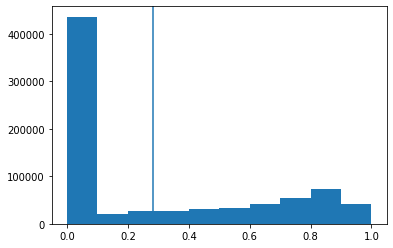

In [ ]:
plt.hist(data[0].flatten())
plt.axvline(data[0].mean())

##Sequential model initializations


In [69]:
images, labels = train_set[0]
in_features = images.numel()
out_features = math.floor(in_features / 2)
out_classes = len(train_set.classes)

torch.Size([1, 28, 28])

### method 1 

In [76]:
network1 = nn.Sequential(
    nn.Flatten(start_dim =1 ),
    nn.Linear(in_features,out_features),
    nn.Linear(out_features, out_classes)
)

network1

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=392, bias=True)
  (2): Linear(in_features=392, out_features=10, bias=True)
)

### method 2

In [78]:
layers = OrderedDict([
  ('flat',nn.Flatten(start_dim=1)),
  ('hidden',nn.Linear(in_features, out_features)),
  ('output', nn.Linear(out_features,out_classes))
])

network2 = nn.Sequential(layers)
network2

Sequential(
  (flat): Flatten(start_dim=1, end_dim=-1)
  (hidden): Linear(in_features=784, out_features=392, bias=True)
  (output): Linear(in_features=392, out_features=10, bias=True)
)

In [77]:
image = images.unsqueeze(0)
network1(image)

tensor([[-0.3858,  0.3713,  0.0122,  0.0821, -0.0005,  0.0168, -0.1262, -0.2523,
          0.1939,  0.2220]], grad_fn=<AddmmBackward0>)

In [79]:
network2(image)

tensor([[-0.1239, -0.1404, -0.3140,  0.1986,  0.4108,  0.2867,  0.2359,  0.1980,
         -0.0851, -0.1285]], grad_fn=<AddmmBackward0>)

### method 3

In [ ]:
#set random value with a seed
torch.manual_seed(50)
network3 = nn.Sequential()
network3.add_module('flat', nn.Flatten(start_dim = 1))
network3.add_module('hidden', nn.Linear(in_features, out_features))
network3.add_module('output', nn.Linear(out_features, out_classes))
network3

In [ ]:
network1(image), network2(image), network3(image)

## Batch Normalization
To normalize the output of layer to keep them in a range

In [ ]:
torch.manual_seed(50)
network1 = nn.Sequential(
      nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
    , nn.ReLU()
    , nn.MaxPool2d(kernel_size=2, stride=2)
    , nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
    , nn.ReLU()
    , nn.MaxPool2d(kernel_size=2, stride=2)
    , nn.Flatten(start_dim=1)  
    , nn.Linear(in_features=12*4*4, out_features=120)
    , nn.ReLU()
    , nn.Linear(in_features=120, out_features=60)
    , nn.ReLU()
    , nn.Linear(in_features=60, out_features=10)
)

In [ ]:
torch.manual_seed(50)
network2 = nn.Sequential(
      nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
    , nn.ReLU()
    , nn.MaxPool2d(kernel_size=2, stride=2)
    , nn.BatchNorm2d(6)
    , nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
    , nn.ReLU()
    , nn.MaxPool2d(kernel_size=2, stride=2)
    , nn.Flatten(start_dim=1)  
    , nn.Linear(in_features=12*4*4, out_features=120)
    , nn.ReLU()
    , nn.BatchNorm1d(120)
    , nn.Linear(in_features=120, out_features=60)
    , nn.ReLU()
    , nn.Linear(in_features=60, out_features=10)
)

In [ ]:
networks = {
    'no_batch_norm': network1
    ,'batch_norm': network2
}

In [ ]:
params = OrderedDict(
    lr = [.01]
    , batch_size = [1000]
    , num_workers = [1]
    , device = ['cuda']
    , trainset = ['normal']
    , network = list(networks.keys())
)

In [ ]:
network = networks[run.network].to(device)

## Reset weights
* of a layer or every layer
* snapshot 
* re-initialization

### reset one layer 
* check - change - check - reset - check

In [80]:
torch.manual_seed(50)
layer = nn.Linear(2,1)

In [89]:
layer.weight
#1 check 

Parameter containing:
tensor([[ 0.1669, -0.6100]], requires_grad=True)

In [84]:
t= torch.rand(2)
o = layer(t)
o.backward()

In [90]:
optimizer = optim.Adam(layer.parameters(), lr=.01)
optimizer.step()
#2 change 

In [86]:
layer.weight
#3 check 

Parameter containing:
tensor([[ 0.1569, -0.6200]], requires_grad=True)

In [87]:
torch.manual_seed(50)
layer.reset_parameters()
#4 reset params and bias

In [88]:
layer.weight
#check

Parameter containing:
tensor([[ 0.1669, -0.6100]], requires_grad=True)

### Reset in a snapshot
* reset all of the weights in an PyTorch model 
* saving the network's state to disk.


In [ ]:
torch.manual_seed(50)
network = nn.Sequential(nn.Linear(2,1))

network[0].weight
# Output
# Parameter containing:
# tensor([[ 0.1669, -0.6100]], requires_grad=True)

torch.save(network.state_dict(), "./network.pt")

t = torch.rand(2)
o = network(t)
o.backward()
optimizer = optim.Adam(network.parameters(), lr=.01)
optimizer.step()

network[0].weight
# Parameter containing:
# tensor([[ 0.1569, -0.6200]], requires_grad=True)

network.load_state_dict(torch.load("./network.pt"))

network[0].weight
# Parameter containing:
# tensor([[ 0.1669, -0.6100]], requires_grad=True)

### Re-initialization

In [91]:
torch.manual_seed(50)
network = nn.Sequential(nn.Linear(2,1))

network[0].weight

t=torch.rand(2)
o = network(t)
o.backward()
optimizer = optim.Adam(network.parameters(),lr=.01)
optimizer.step()

network[0].weight
torch.manual_seed(50)
network = nn.Sequential(nn.Linear(2,1))

network[0].weight

Parameter containing:
tensor([[ 0.1669, -0.6100]], requires_grad=True)

##Training many networks
 
 reset in a different loop
 replace the dict with a factory

In [ ]:
# handles the production of networks
class NetworkFactory():
    @staticmethod
    def get_network(name):
        if name == 'network':
            torch.manual_seed(50)
            return nn.Sequential(
                nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
                , nn.ReLU()
                , nn.MaxPool2d(kernel_size=2, stride=2)
                , nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
                , nn.ReLU()
                , nn.MaxPool2d(kernel_size=2, stride=2)
                , nn.Flatten(start_dim=1)  
                , nn.Linear(in_features=12*4*4, out_features=120)
                , nn.ReLU()
                , nn.Linear(in_features=120, out_features=60)
                , nn.ReLU()
                , nn.Linear(in_features=60, out_features=10)
            )
        else:
            return None

In [ ]:
network = NetworkFactory.get_network(run.network).to(device)

# Max pooling
* choose maximum among a pool, then reduce dim.

In [ ]:
class NetworkFactory():
    @staticmethod
    def get_network(name):
        if name == 'max_pool':
            torch.manual_seed(50)
            return nn.Sequential(
                    nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
                , nn.ReLU()
                , nn.MaxPool2d(kernel_size=2, stride=2)
                , nn.BatchNorm2d(6)
                , nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
                , nn.ReLU()
                , nn.MaxPool2d(kernel_size=2, stride=2)
                , nn.Flatten(start_dim=1)  
                , nn.Linear(in_features=12*4*4, out_features=120)
                , nn.ReLU()
                , nn.BatchNorm1d(120)
                , nn.Linear(in_features=120, out_features=60)
                , nn.ReLU()
                , nn.Linear(in_features=60, out_features=10)
            )
        elif name == 'no_max_pool':
            torch.manual_seed(50)
            return nn.Sequential(
                    nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
                , nn.ReLU()
                # , nn.MaxPool2d(kernel_size=2, stride=2)
                , nn.BatchNorm2d(6)
                , nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
                , nn.ReLU()
                # , nn.MaxPool2d(kernel_size=2, stride=2)
                , nn.Flatten(start_dim=1)  
                , nn.Linear(in_features=12*20*20, out_features=120)
                , nn.ReLU()
                , nn.BatchNorm1d(120)
                , nn.Linear(in_features=120, out_features=60)
                , nn.ReLU()
                , nn.Linear(in_features=60, out_features=10)
            )
        else:
            return None


In [ ]:
params = OrderedDict(
    lr = [.01]
    , batch_size = [1000]
    , num_workers = [1]
    , device = ['cuda']
    , network = ['max_pool', 'no_max_pool']
)

In [ ]:
#compare the results with and without maxpooling 
m = RunManager()
for run in RunBuilder.get_runs(params):

    device = torch.device(run.device)
    network = NetworkFactory.get_network(run.network).to(device)
    loader = DataLoader(
          train_set
        , batch_size=run.batch_size
        , num_workers=run.num_workers
    )
    optimizer = optim.Adam(network.parameters(), lr=run.lr)
    
    m.begin_run(run, network, loader)
    for epoch in range(20):
        m.begin_epoch()
        for batch in loader:
            
            images = batch[0].to(device)
            labels = batch[1].to(device)
            preds = network(images) # Pass Batch
            loss = F.cross_entropy(preds, labels) # Calculate Loss
            optimizer.zero_grad() # Zero Gradients
            loss.backward() # Calculate Gradients
            optimizer.step() # Update Weights
            
            m.track_loss(loss, batch)
            m.track_num_correct(preds, labels)
        m.end_epoch()
    m.end_run()
m.save('results')